In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json

In [28]:
path = 'F:\Music_Notes'

In [29]:
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files in %s"%(len(files),path))

found 246 .wav files in F:\Music_Notes


In [30]:
def get_features(y, sr):
    y = y[0:sr]
    S = librosa.feature.melspectrogram(y,sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

In [31]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
   # if i % 100 == 0:  this was because there were 6000 sounds in original dataset and printing every single is lengthy
    print("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f)
        if len(y) < 2:
            print("error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except:
        print("error loading %s" % f)
        
print("calculated %d feature vectors"%len(feature_vectors))
n = len(feature_vectors)

get 1 of 246 = F:\Music_Notes\072_the-mystery-begins-guitar-space.wav
get 2 of 246 = F:\Music_Notes\074_acoustic-guitar-strummy1.wav
get 3 of 246 = F:\Music_Notes\074_acoustic-guitar-strummy2.wav
get 4 of 246 = F:\Music_Notes\075_coal-mine-guitar-part.wav
get 5 of 246 = F:\Music_Notes\079_bright-leady-guitar.wav
get 6 of 246 = F:\Music_Notes\080_country-boy-slide-guitar.wav
get 7 of 246 = F:\Music_Notes\080_country-boy-slide-guitar2.wav
get 8 of 246 = F:\Music_Notes\081_deeply-crunchy-guitar-stutter-funk.wav
get 9 of 246 = F:\Music_Notes\084_lone-wolf-guitar-strut.wav
get 10 of 246 = F:\Music_Notes\085_fretless-dulcimer.wav
get 11 of 246 = F:\Music_Notes\089_backwards-acoustic-guitar-looper.wav
get 12 of 246 = F:\Music_Notes\090_flangy-guitar-picked-melody.wav
get 13 of 246 = F:\Music_Notes\090_flangy-guitar-strummed-melody.wav
get 14 of 246 = F:\Music_Notes\a+dog+drinking.wav
get 15 of 246 = F:\Music_Notes\A.wav
get 16 of 246 = F:\Music_Notes\aerosol+spray+2.wav
get 17 of 246 = F:\Mus

In [32]:
print(len(feature_vectors[0]))

39


In [33]:
model = TSNE(n_components=2, learning_rate=150, perplexity=2, verbose=2, angle=0.1).fit_transform(feature_vectors)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 246 samples in 0.001s...
[t-SNE] Computed neighbors for 246 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 246 / 246
[t-SNE] Mean sigma: 0.065810
[t-SNE] Computed conditional probabilities in 0.000s
[t-SNE] Iteration 50: error = 90.5631714, gradient norm = 0.5015198 (50 iterations in 0.241s)
[t-SNE] Iteration 100: error = 89.8712692, gradient norm = 0.4199058 (50 iterations in 0.218s)
[t-SNE] Iteration 150: error = 85.5427780, gradient norm = 0.4205679 (50 iterations in 0.213s)
[t-SNE] Iteration 200: error = 81.9803543, gradient norm = 0.4730735 (50 iterations in 0.220s)
[t-SNE] Iteration 250: error = 81.7839661, gradient norm = 0.4502057 (50 iterations in 0.183s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.783966
[t-SNE] Iteration 300: error = 1.4081279, gradient norm = 0.0207421 (50 iterations in 0.227s)
[t-SNE] Iteration 350: error = 0.9919744, gradient norm = 0.0130887 (5

In [34]:
print(files[0])

F:\Music_Notes\072_the-mystery-begins-guitar-space.wav


In [35]:
names = [None]*n
i = 0
for note in files:
    spl = note.split("\\")
    x = spl[2].split(".")
    names[i] = x[0]
    i+=1
#print(names)

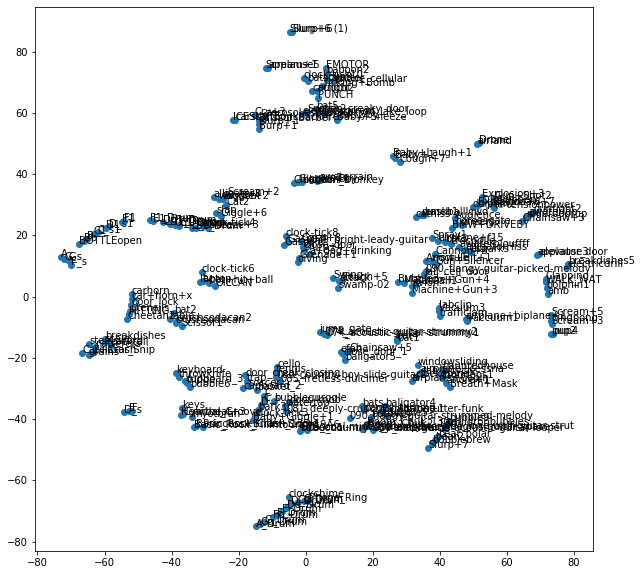

In [36]:
x_axis=model[:,0]
y_axis=model[:,1]
plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
for i, txt in enumerate(names):
    plt.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()

In [37]:
print(len(x_axis))
print(x_axis)

246
[ 16.76137      6.2204523    5.5392723   -1.287951     1.3443676
   0.42012298  -8.782829    -5.844643    41.482483    -7.6992574
  20.130266    35.733337    13.144783     1.1944207  -73.0951
 -12.152031    51.029488    47.74075     31.59166     34.21664
  39.414806   -27.498083    47.623646    72.17621     69.02609
 -11.281106    35.717094     9.945257    44.48727     31.645695
  66.426216    45.74791      4.1739125    5.3956475  -14.78077
 -65.142914    -1.6459509    6.2026696   -1.2104155   26.5843
 -15.765032    25.96356      9.185901    23.634424    11.599702
 -14.16677    -32.679165   -33.36729     35.36705    -14.528082
 -28.859898    27.313208   -39.254303    41.451374    27.084011
   2.9844754   32.45396      9.567082    16.707535     0.5573774
 -66.13785    -32.854355    38.67832     39.5233      40.255455
  43.606968    18.577307    18.32       -67.54043    -59.940624
  78.13954     43.02325     27.558971    19.392017    24.3217
 -34.592854    42.67941     37.679436    -

In [38]:
from matplotlib.widgets import Button

<IPython.core.display.Javascript object>


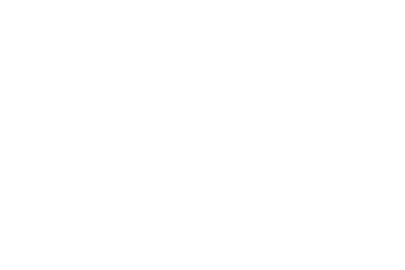

<IPython.core.display.Javascript object>


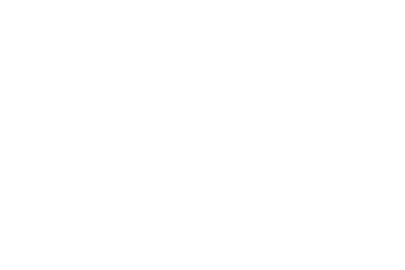

In [39]:
import winsound
import matplotlib.pyplot as plt
%matplotlib nbagg
import numpy as np; np.random.seed(1)
import mpld3
x = x_axis
y = y_axis

names = np.array(names)
c = np.random.randint(1,5,size=n)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c,s=n, cmap=cmap, norm=norm)
ax.set_facecolor("black")

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            winsound.PlaySound(sound_paths[ind["ind"][0]], winsound.SND_ASYNC | winsound.SND_ALIAS )
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                winsound.PlaySound(None, winsound.SND_ASYNC)
                fig.canvas.draw_idle()



fig.canvas.mpl_connect("motion_notify_event", hover)

import plotly.graph_objects as go
f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])
scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    print("hell yes")
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

scatter.on_click(update_point)
plt.show()

In [40]:
#print(x)

In [104]:
colr = []
for  k in range(n):
    if(int(x[k]) < -60):
        if(int(y[k]) < -60):
            colr.append("darkblue")
        elif(y[k] < -40):
            colr.append("mediumspringgreen")
        elif(y[k] < -20):
            colr.append("royalblue")
        elif(y[k] < 0):
            colr.append("palegreen")
        elif(y[k] < 20):
            colr.append("darkorchid")
        elif(y[k] < 40):
            colr.append("darkgrey")
        elif(y[k] < 60):
            colr.append("indianred")
        else:
            colr.append("choclate")
    elif(x[k] < -40):
        if(int(y[k]) < -60):
            colr.append("darkorchid")
        elif(y[k] < -40):
            colr.append("darkkhaki")
        elif(y[k] < -20):
            colr.append("mediumvioletred")
        elif(y[k] < 0):
            colr.append("goldenrod")
        elif(y[k] < 20):
            colr.append("maroon")
        elif(y[k] < 40):
            colr.append("violet")
        elif(y[k] < 60):
            colr.append("burlywood")
        else:
            colr.append("purple")
    elif(x[k] < -20):
        if(int(y[k]) < -60):
            colr.append("green")
        elif(y[k] < -40):
            colr.append("seagreen")
        elif(y[k] < -20):
            colr.append("yellow")
        elif(y[k] < 0):
            colr.append("blue")
        elif(y[k] < 20):
            colr.append("lightgreen")
        elif(y[k] < 40):
            colr.append("brown")
        elif(y[k] < 60):
            colr.append("fuchsia")
        else:
            colr.append("purple")
    elif(x[k] < 0):
        if(int(y[k]) < -60):
            colr.append("sandybrown")
        elif(y[k] < -40):
            colr.append("coral")
        elif(y[k] < -20):
            colr.append("pink")
        elif(y[k] < 0):
            colr.append("magenta")
        elif(y[k] < 20):
            colr.append("khaki")
        elif(y[k] < 40):
            colr.append("brown")
        elif(y[k] < 60):
            colr.append("lavender")
        else:
            colr.append("plum")
    elif(x[k] < 20):
        if(int(y[k]) < -60):
            colr.append("green")
        elif(y[k] < -40):
            colr.append("seagreen")
        elif(y[k] < -20):
            colr.append("yellow")
        elif(y[k] < 0):
            colr.append("blue")
        elif(y[k] < 20):
            colr.append("seagreen")
        elif(y[k] < 40):
            colr.append("brown")
        elif(y[k] < 60):
            colr.append("fuchsia")
        else:
            colr.append("purple")
    elif(x[k] < 40):
        if(int(y[k]) < -60):
            colr.append("gainsboro")
        elif(y[k] < -40):
            colr.append("palevioletred")
        elif(y[k] < -20):
            colr.append("silver")
        elif(y[k] < 0):
            colr.append("rosybrown")
        elif(y[k] < 20):
            colr.append("peru")
        elif(y[k] < 40):
            colr.append("tan")
        elif(y[k] < 60):
            colr.append("gray")
        else:
            colr.append("lawngreen")
    elif(x[k] < 60):
        if(int(y[k]) < -60):
            colr.append("lightslategray")
        elif(y[k] < -40):
            colr.append("olivedrab")
        elif(y[k] < -20):
            colr.append("yellow")
        elif(y[k] < 0):
            colr.append("cornflowerblue")
        elif(y[k] < 20):
            colr.append("lightskyblue")
        elif(y[k] < 40):
            colr.append("indigo")
        elif(y[k] < 60):
            colr.append("fuchsia")
        else:
            colr.append("purple")
    else:
        if(int(y[k]) < -60):
            colr.append("green")
        elif(y[k] < -40):
            colr.append("seagreen")
        elif(y[k] < -20):
            colr.append("mediumturquoise")
        elif(y[k] < 0):
            colr.append("forestgreen")
        elif(y[k] < 20):
            colr.append("lightskyblue")
        elif(y[k] < 40):
            colr.append("brown")
        elif(y[k] < 60):
            colr.append("fuchsia")
        else:
            colr.append("purple")
    
    

In [111]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool
from bokeh.plotting import figure, output_file, show
from bokeh.models import CustomJSHover

from math import sin
from random import random

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform

from bokeh import events
from bokeh.io import output_file, show
from bokeh.layouts import column, row
from bokeh.models import Button, CustomJS, Div

from bokeh.events import Tap
from bokeh.models.callbacks import CustomJS

from bokeh.resources import Resources
from bokeh.io.state import curstate
from bokeh.io import curdoc, output_file, save
from bokeh.util.browser import view
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import RadioGroup


In [112]:

class MyResources(Resources):
    @property
    def css_raw(self):
        return super().css_raw + [
            """.bk-root {
                    background-color: #A9A9A9;
                    border-color: #000000;
                    }
                
            """
        ]

In [144]:
output_file("openurl.html")

curstate().file['resources'] = MyResources(mode='cdn')
#save(tabs)
view("./openurl.html")




source = ColumnDataSource(data=dict(
    x=x,
    y=y,
    label = names,
    spath = files,
    color = colr
    ))
i = 4;
#for a datapoint information
TOOLTIPS = """
    <div>
        <div style = "display : none">
            <audio id = "myAudio" controls autoplay>
              <source src= @spath>
            </audio>
        </div>
        <div>
            <span id="song_index" style="font-size: 15px; color: #966;">$index</span>
            <span style="font-size: 17px; font-weight: bold;">@label</span>
        </div>
    </div>
"""

hover = HoverTool(tooltips=TOOLTIPS, show_arrow=False)
fig = figure(plot_width=1200, plot_height=700,
           tools= [hover], title="Click the Dots")
fig.background_fill_color = "black"

fig.grid.grid_line_color = None
fig.circle('x', 'y', color='color', size=10, source=source)

def display_event(div,attributes=[], style = 'float:left;clear:left;font_size=13px'):
    "Build a suitable CustomJS to display the current event in the div model."
    return CustomJS(args=dict(div=div,s2=s2,source=source), code="""
        var attrs = %s; var args = [];
        var tune_list = s2.data['tune'];
        var colr = source.data['color'];
        var indx = parseInt(document.getElementById("song_index").innerHTML);
        var fsong = source.data['spath'];
        for (var i = 0; i<attrs.length; i++) {
            args.push(attrs[i] + '=' + Number(cb_obj[attrs[i]]).toFixed(2));
        }
        var line = "<span style=%r><b>" + cb_obj.event_name + "</b>(" + args.join(", ") + ")</span>\\n";
        var z = cb_obj.event_name;
        if(z == "tap"){
           tune_list.push(fsong[indx].replace(/\\\/g,"/"));
           colr[indx] = "red";
           }
           
        var text = div.text.concat(line);
        var lines = text.split("\\n")
        if(tune_list.length != 4)
            div.text = lines.join("\\n")  + tune_list + " length = "+tune_list.length;
        else
            div.text =  "You can Play the song";
        s2.change.emit();
        source.change.emit();
    """ % (attributes,style))
  
def play_song(div):
    "Build a suitable CustomJS to display the current event in the div model."
    return CustomJS(args=dict(div=div,s1=s2), code="""
        var list_song = s1.data['tune'];
        var txt = "";
         
         for(var song of list_song){
             txt += song + "<br>";
        }
        div.text = "The tune will be played in loop<br>" + txt;
        function playa(songa){
               var audio = new Audio(songa);
               audio.play();
        }
        var t = 2000;
        if(list_song.length == 4){
                setInterval(function(){  var audio = new Audio(list_song[0]);  audio.play(); }, 4000);
                setInterval(function(){  var audio = new Audio(list_song[1]);  audio.play(); }, 3000);
                setInterval(function(){  var audio = new Audio(list_song[2]);  audio.play(); }, 2000);
                setInterval(function(){  var audio = new Audio(list_song[3]);  audio.play(); }, 1000);
            }
       // s1.change.emit();
    """) 

def clear_song(div):
    "Build a suitable CustomJS to display the current event in the div model."
    return CustomJS(args=dict(div=div,s3=s2), code="""
        var list_song = s3.data['tune'];
        var txt = "";
       
        list_song = [];
        div.text = "The tune will be played in loop<br>" + txt;
        function playa(songa){
                 startTime = new Date();
                 var audio = new Audio(songa);
                 audio.play();
                 endTime = new Date();
                 var timeDiff = endTime - startTime; //in ms
                 if(timeDiff >= 2000)
                      audio.pause();
        }
        var t = 2000;
           
                setTimeout(playa(list_song[0]), t);
                setTimeout(playa(list_song[1]), t + 4000);
                setTimeout(playa(list_song[2]), t + 8000);
                setTimeout(playa(list_song[3]), t + 12000);
               // if(t %6000 == 0 && t!=0)
                 //   t += 8000;
            
        

       // s1.change.emit();
    """) 

tune = []
s2 = ColumnDataSource(data=dict(tune = tune))

div = Div(width=400, height=fig.plot_height, height_policy="fixed")
div2 = Div(width=100, height=70, height_policy="fixed")
button = Button(label="Play the tune", button_type="success")
button1 = Button(label="Clear", button_type="success")
radio_group = RadioGroup(
        labels=["Option 1", "Option 2", "Option 3","Option 4"], active=0)

#show(radio_group)


layout = column(button,button1,radio_group, row(fig, div))

## Events with no attributes
button.js_on_event(events.ButtonClick, play_song(div)) # Button click
button1.js_on_event(events.ButtonClick, play_song(div)) # Button click
fig.js_on_event(events.LODStart, display_event(div))         # Start of LOD display
fig.js_on_event(events.LODEnd, display_event(div))           # End of LOD display

## Events with attributes
point_attributes = ['x', 'y', 'sx', 'sy']                  # Point events
pan_attributes = point_attributes + ['delta_x', 'delta_y'] # Pan event

point_events = [events.Tap,]

for event in point_events:
    fig.js_on_event(event, display_event(div,attributes = point_attributes))

fig.js_on_event(events.Pan, display_event(div, attributes=pan_attributes))

#url = "http://www.colors.commutercreative.com/@color/"
#taptool = fig.select(type=TapTool)
#taptool.callback = OpenURL(url=url)

show(layout)                                    #shows you the visualization